In [68]:
import pandas as pd
import xml.etree.ElementTree as ET
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import os
import numpy as np
plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
        "text.usetex": True  
    })

In [35]:
df_dgpie = pd.read_csv('./assets/ANR_DGPIE.csv',on_bad_lines="warn", sep=";")
df_dos = pd.read_csv('./assets/ANR_DOS.csv', sep=";")

# DGPIE

In [7]:
df_dgpie.shape

(2456, 11)

In [15]:
climate_df = df_dgpie.copy()
climate_df["has_resume"] = ~climate_df["Projet.Resume.Francais"].isna()
print(climate_df["has_resume"].value_counts(normalize=True))

has_resume
True     0.623779
False    0.376221
Name: proportion, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


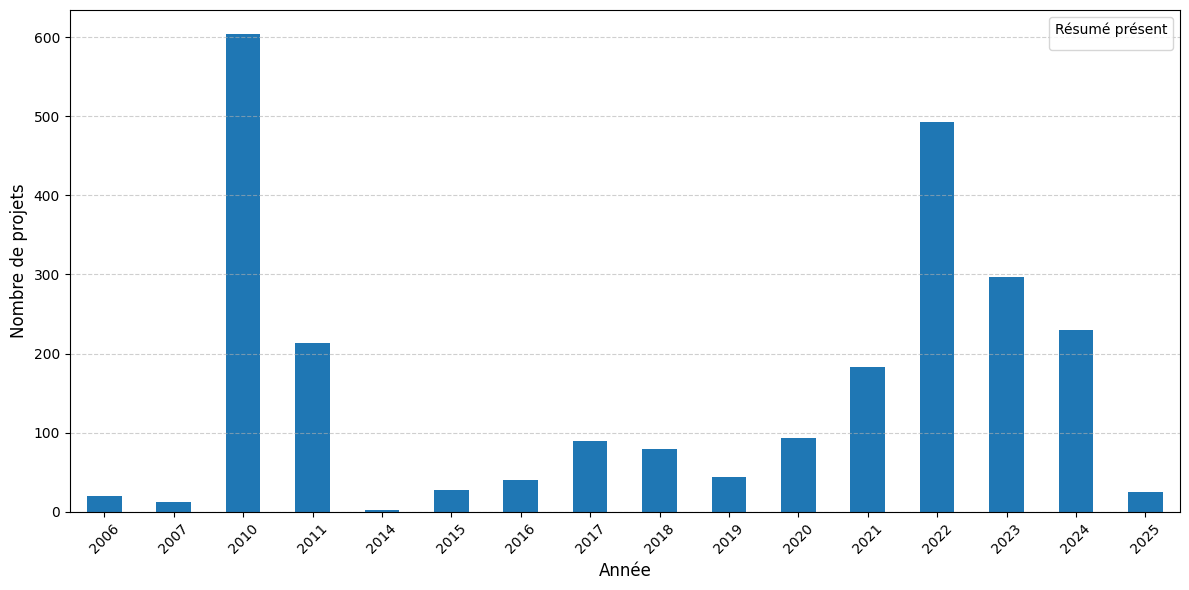

In [17]:
climate_df = df_dgpie.copy()

grouped = climate_df.groupby(["Action.Edition"]).size()

grouped.sort_index().plot(kind="bar", stacked=False, figsize=(12, 6))

plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de projets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Résumé présent")
plt.tight_layout()
plt.show()

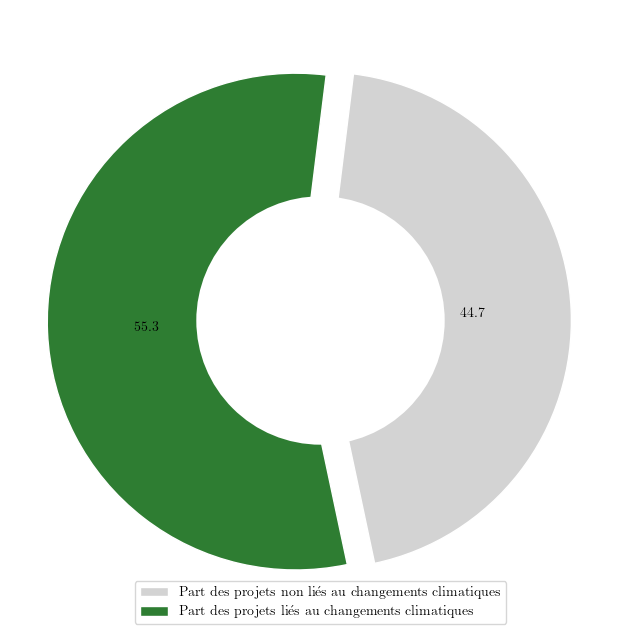

In [75]:
counts = df_dgpie['is_climate_related'].value_counts().sort_index()
labels = ['Part des projets non liés au changements climatiques', 'Part des projets liés au changements climatiques']

colors = ['lightgray', '#2E7D32'] 

fig, ax = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax.pie(
    counts,
    labels=['', ''],  # Pas de labels sur le graphique
    autopct='%1.1f%%',
    startangle=-78,
    colors=colors,
    explode=(0.01, 0.1),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.5, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)

# Légende avec les vrais labels
ax.legend(wedges, labels, loc='lower center')

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.savefig("./exports/CC_projects_part_allDF_DGPIE.pdf")
plt.show()


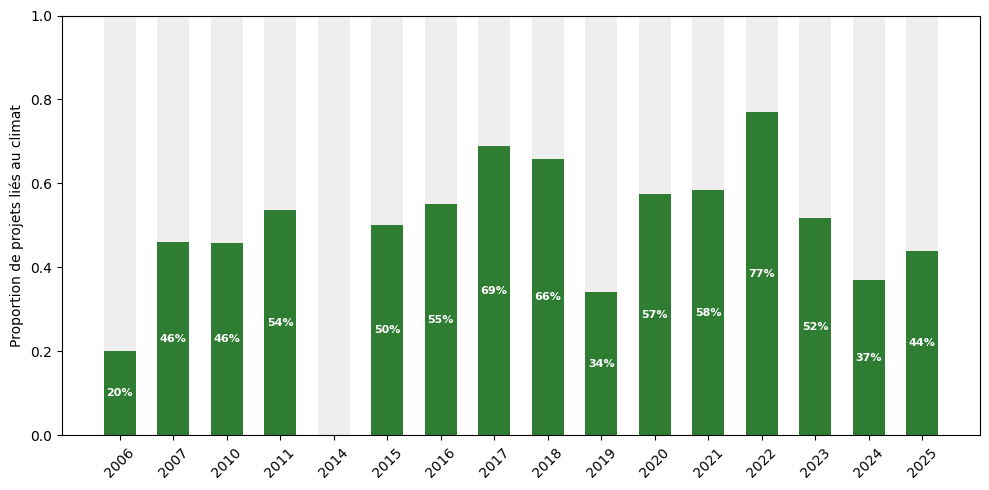

In [34]:
climate_ratio = df_dgpie.groupby("Action.Edition")["is_climate_related"].mean()

fig, ax = plt.subplots(figsize=(10, 5))
programmes = climate_ratio.index
ratios = climate_ratio.values
bar_width = 0.6
x = range(len(programmes))

ax.bar(x, [1]*len(ratios), color="#EEEEEE", width=bar_width, zorder=0)
bars = ax.bar(x, ratios, color="#2E7D32", width=bar_width, zorder=1)

for i, bar in enumerate(bars):
    height = bar.get_height()
    if height!= 0 :
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height / 2,  
            f"{height:.0%}", 
            ha='center', va='center', 
            color='white', fontsize=8, fontweight='bold'
        )

ax.set_ylabel("Proportion de projets liés au climat")
# ax.set_title("Évolution de la proportion de projets liés au changement climatique par programme")
ax.set_xticks(x)
ax.set_xticklabels(programmes, rotation=45)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.savefig("./exports/climate_proportion_by_fp_DGPIE.pdf")
plt.show()


# DOS

In [36]:
df_dos.shape

(29998, 13)

In [37]:
climate_df = df_dos.copy()
climate_df["has_resume"] = ~climate_df["Projet.Resume.Francais"].isna()
print(climate_df["has_resume"].value_counts(normalize=True))

has_resume
True     0.920561
False    0.079439
Name: proportion, dtype: float64


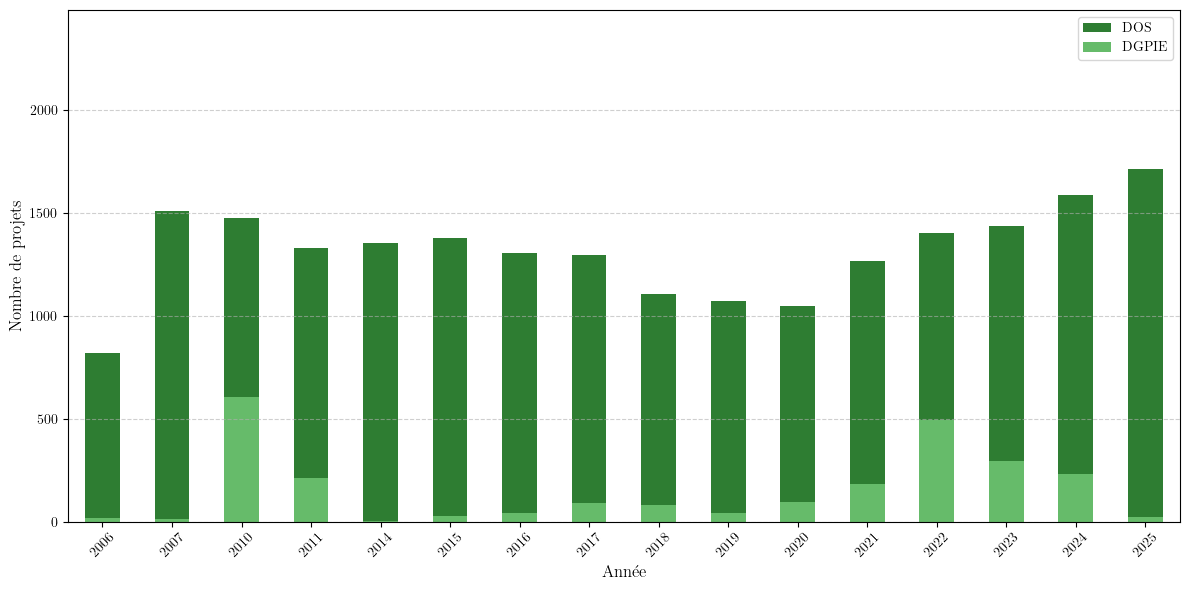

In [83]:
climate_df = df_dos.copy()

grouped = climate_df.groupby(["AAP.Edition"]).size()
grouped.sort_index().plot(kind="bar", stacked=False, figsize=(12, 6), label="DOS", color="#2E7D32")

grouped = df_dgpie.groupby(["Action.Edition"]).size()
grouped.sort_index().plot(kind="bar", stacked=False, figsize=(12, 6), label="DGPIE", color="#66BB6A")

plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de projets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend()
plt.savefig("./exports/anr_project_number.pdf")
plt.show()

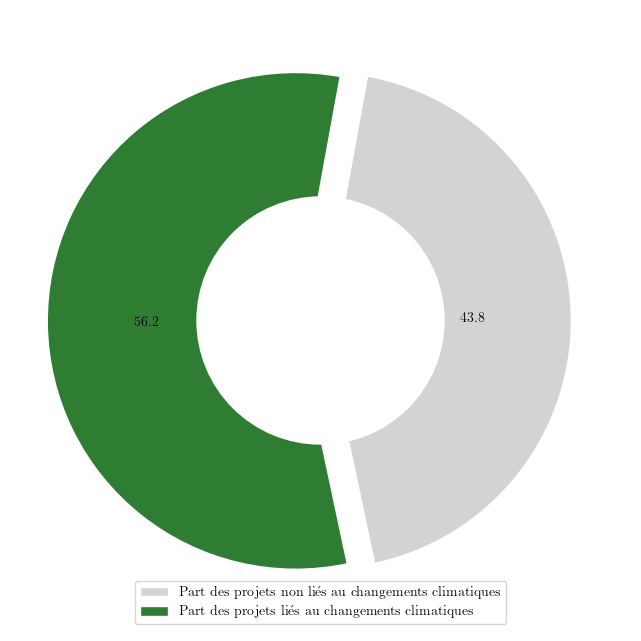

In [74]:
counts = df_dos['is_climate_related'].value_counts().sort_index()
labels = ['Part des projets non liés au changements climatiques', 'Part des projets liés au changements climatiques']

colors = ['lightgray', '#2E7D32'] 

fig, ax = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax.pie(
    counts,
    labels=['', ''],  # Pas de labels sur le graphique
    autopct='%1.1f%%',
    startangle=-78,
    colors=colors,
    explode=(0.01, 0.1),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.5, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)

# Légende avec les vrais labels
ax.legend(wedges, labels, loc='lower center')

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.savefig("./exports/CC_projects_part_allDF_DOS.pdf")
plt.show()


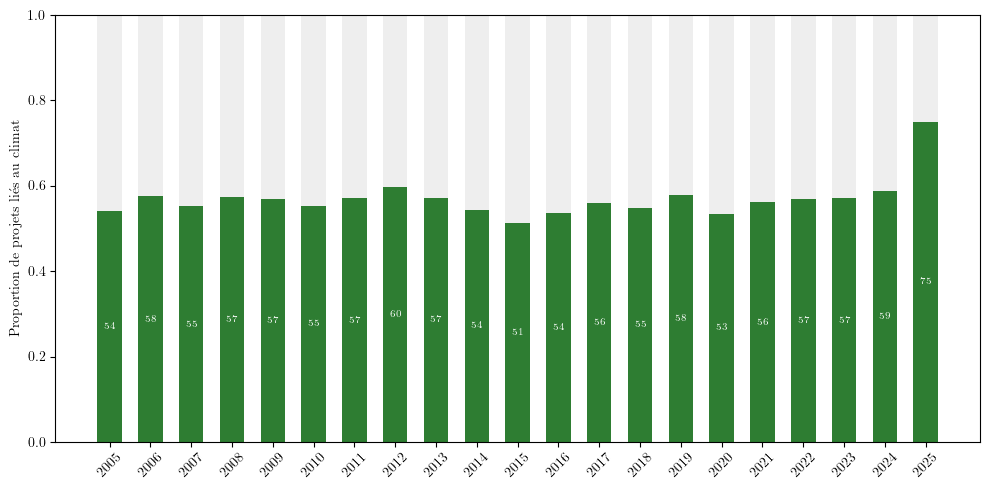

In [69]:
climate_ratio = df_dos.groupby("AAP.Edition")["is_climate_related"].mean()

fig, ax = plt.subplots(figsize=(10, 5))
programmes = climate_ratio.index
ratios = climate_ratio.values
bar_width = 0.6
x = range(len(programmes))

ax.bar(x, [1]*len(ratios), color="#EEEEEE", width=bar_width, zorder=0)
bars = ax.bar(x, ratios, color="#2E7D32", width=bar_width, zorder=1)

for i, bar in enumerate(bars):
    height = bar.get_height()
    if height!= 0 :
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height / 2,  
            f"{height:.0%}", 
            ha='center', va='center', 
            color='white', fontsize=7, fontweight='bold'
        )

ax.set_ylabel("Proportion de projets liés au climat")
ax.set_xticks(x)
ax.set_xticklabels(programmes, rotation=45)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.savefig("./exports/climate_proportion_by_fp_DOS.pdf")
plt.show()


---

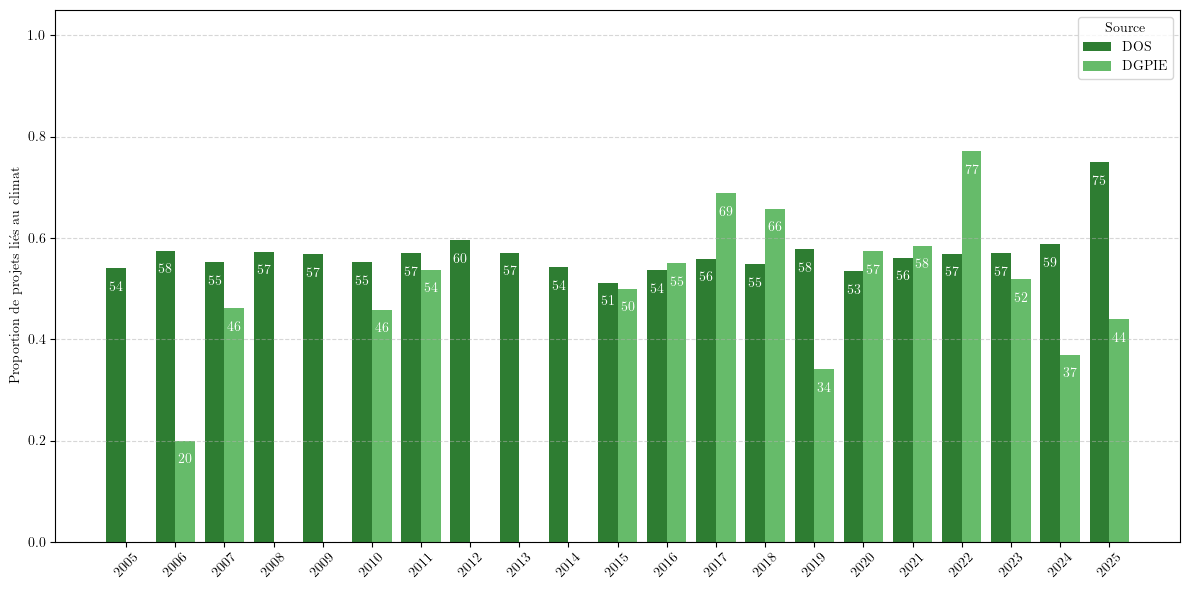

In [73]:

# 1. Calcul des ratios (proportions) séparément
ratio_dos = df_dos.groupby("AAP.Edition")["is_climate_related"].mean()
ratio_dgpie = df_dgpie.groupby("Action.Edition")["is_climate_related"].mean()

# 2. Union des années des deux DataFrames
all_editions = sorted(set(ratio_dos.index).union(ratio_dgpie.index))

# 3. Créer des vecteurs alignés avec toutes les éditions (remplir les années manquantes avec 0)
dos_values = [ratio_dos.get(edition, 0) for edition in all_editions]
dgpie_values = [ratio_dgpie.get(edition, 0) for edition in all_editions]

# 4. Création du barplot groupé
x = np.arange(len(all_editions))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

bars_dos = ax.bar(x - bar_width/2, dos_values, width=bar_width, label="DOS", color="#2E7D32")   # Vert foncé
bars_dgpie = ax.bar(x + bar_width/2, dgpie_values, width=bar_width, label="DGPIE", color="#66BB6A")  # Vert clair


# 5. Ajouter les pourcentages au-dessus de chaque barre
for bars in [bars_dos, bars_dgpie]:
    for bar in bars:
        height = bar.get_height()
        if height != 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height - 0.05,
                f"{height:.0%}",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',color="white"
            )

# 6. Mise en forme
ax.set_ylabel("Proportion de projets liés au climat")
ax.set_xticks(x)
ax.set_xticklabels(all_editions, rotation=45)
ax.set_ylim(0, 1.05)
ax.legend(title="Source")
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("./exports/climate_proportion_grouped.pdf")
plt.show()


In [78]:
dos_values = [ratio_dos.get(edition, 0) for edition in all_editions]
dgpie_values = [ratio_dgpie.get(edition, 0) for edition in all_editions]

print(np.mean(dos_values))
print(np.mean(dgpie_values))

0.5689943735796034
0.3644570994357051
